# 概览

<li>这个项目中，我们将应用RFM模型，使用Python细分客户，找出优质客户。
    
# 模型介绍

<li>**RFM模型**代表**Recency**(最近一次消费), **Frequency**(消费频率) 和 **Monetary**(消费金额)。

<li>RFM模型是衡量客户价值和客户创利能力的重要工具和手段。该模型通过一个客户的近期购买行为、购买的总体频率以及花了多少钱三项指标来描述该客户的价值状况。

<li>RFM模型较为动态地层示了一个客户的全部轮廓，这对个性化的沟通和服务提供了依据，同时，如果与该客户打交道的时间足够长，也能够较为精确地判断该客户的长期价值(甚至是终身价值)，通过改善三项指标的状况，从而为更多的营销决策提供支持。

<li>在RFM模式中，R(Recency)表示客户最近一次购买的时间有多远，F(Frequency)表示客户在最近一段时间内购买的次数，M (Monetary)表示客户在最近一段时间内购买的金额。一般的分析型CRM着重在对于客户贡献度的分析，RFM则强调以**客户的行为**来区分客户。

以上内容摘自[RFM模型](http://wiki.mbalib.com/wiki/RFM%E6%A8%A1%E5%9E%8B)。


# 计算步骤

`1.`为数据集中的每个客户的计算RFM度量。

`2.`根据RFM度量，添加分类数字到数据集。

`3.`根据RFM得分，分类客户。

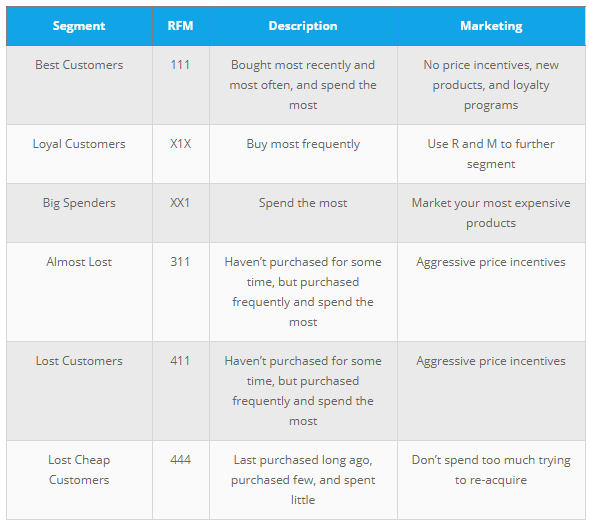


# 使用的数据

<li>RFM模型基于用户行为数据，这个项目中，使用的数据集来自[UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/online+retail)。

### 导入数据

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#coding:utf-8
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [191]:
df = pd.read_excel("Online_Retail.xlsx")

In [248]:
df1 = df

In [249]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [250]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


# Explore Data

In [251]:
#create a column name total_amount
df1["total_amount"]=df1["Quantity"]*df1["UnitPrice"]

In [252]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [253]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [254]:
df1_client=df1[["CustomerID","Country"]].drop_duplicates()
df1_client.groupby("Country").count().sort_values(by="CustomerID",ascending=False)

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


In [255]:
# We will only look at United Kingdom this time
df1 = df1.query("Country == 'United Kingdom'")

In [256]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [257]:
df1.isnull().any()

InvoiceNo       False
StockCode       False
Description      True
Quantity        False
InvoiceDate     False
UnitPrice       False
CustomerID       True
Country         False
total_amount    False
dtype: bool

In [258]:
df1.describe()

,Quantity,UnitPrice,CustomerID,total_amount
count,495478.000000,495478.000000,361878.000000,495478.000000
mean,8.605486,4.532422,15547.871368,16.525065
std,227.588756,99.315438,1594.402590,394.839116
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,3.290000
50%,3.000000,2.100000,15514.000000,8.290000
75%,10.000000,4.130000,16931.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [259]:
# A normal order should with positive quantity and unitprice.
#Filter data by use total_amount > 0 , and pass to df 1
df1 = df1[df1["total_amount"] > 0]

In [260]:
df1.describe()

,Quantity,UnitPrice,CustomerID,total_amount
count,485123.000000,485123.000000,354321.000000,485123.000000
mean,9.610738,3.849679,15552.486392,18.603987
std,161.904143,34.677371,1594.527150,281.280229
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,14194.000000,3.360000
50%,3.000000,2.100000,15522.000000,8.420000
75%,10.000000,4.130000,16931.000000,16.950000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [268]:
#Only use CustomerID not null
df1 = df1[pd.notnull(df1['CustomerID'])]

In [269]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [270]:
df1.shape

(354321, 9)

In [271]:
df1.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
total_amount           float64
dtype: object

In [272]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 9 columns):
InvoiceNo       354321 non-null object
StockCode       354321 non-null object
Description     354321 non-null object
Quantity        354321 non-null int64
InvoiceDate     354321 non-null datetime64[ns]
UnitPrice       354321 non-null float64
CustomerID      354321 non-null float64
Country         354321 non-null object
total_amount    354321 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


In [273]:
#Print unique value for each columns
for _ in df1.columns:
    print (_,df1[_].nunique())

InvoiceNo 16646
StockCode 3645
Description 3844
Quantity 293
InvoiceDate 15612
UnitPrice 402
CustomerID 3920
Country 1
total_amount 2792


In [274]:
df1.InvoiceDate.min(),df1.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

**The earliest order at 2010-12-01 08:26:00 and the latest order at 2011-12-09 12:49:00.We will set now as 2011-12-10 because we calculate Recency.**

In [275]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [276]:
#Convert data type for InvoiceDate
df1["InvoiceDate"]=pd.to_datetime(df1["InvoiceDate"])

In [277]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 根据RFM模型分类客户

In [295]:
df1['NOW']=NOW

In [297]:
#Calculate recency
df1["recency"]=df1['NOW'] - df['InvoiceDate']

In [298]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,NOW,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2011-12-10,373 days 15:34:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-10,373 days 15:34:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2011-12-10,373 days 15:34:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-10,373 days 15:34:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-10,373 days 15:34:00


In [506]:
#Groupby CustomerID,then sue agg
RFMtable = df1.groupby("CustomerID").agg({'recency':'max','total_amount':'sum','InvoiceNo':'count'})

In [507]:
#rename columns
RFMtable.rename(columns={
    'recency':'Recency',
    'total_amount':'Monetary',
    'InvoiceNo':'Frequency'},inplace=True)

In [508]:
RFMtable.head()

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,325 days 13:59:00,77183.60,1
12747.0,369 days 08:22:00,4196.01,103
12748.0,373 days 11:12:00,33719.73,4595
12749.0,213 days 08:35:00,4090.88,199
12820.0,326 days 11:26:00,942.34,59


In [509]:
RFMtable['Recency'] = RFMtable['Recency'].dt.days

In [510]:
RFMtable.head()

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,325,77183.60,1
12747.0,369,4196.01,103
12748.0,373,33719.73,4595
12749.0,213,4090.88,199
12820.0,326,942.34,59


In [511]:
RFMtable.tail()

,Recency,Monetary,Frequency
CustomerID,,,
18280.0,277,180.60,10
18281.0,180,80.82,7
18282.0,126,178.05,12
18283.0,337,2094.88,756
18287.0,201,1837.28,70


In [512]:
df1.query("CustomerID == 12346.0")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,NOW,recency
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011-12-10,325 days 13:59:00


In [513]:
df1.query("CustomerID == 12747.0")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,NOW,recency
9754,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,2.55,12747.0,United Kingdom,30.60,2011-12-10,369 days 08:22:00
9755,537215,85124B,BLUE JUICY FRUIT PHOTO FRAME,6,2010-12-05 15:38:00,2.55,12747.0,United Kingdom,15.30,2011-12-10,369 days 08:22:00
9756,537215,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-05 15:38:00,1.69,12747.0,United Kingdom,27.04,2011-12-10,369 days 08:22:00
9757,537215,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2010-12-05 15:38:00,1.65,12747.0,United Kingdom,39.60,2011-12-10,369 days 08:22:00
9758,537215,85064,CREAM SWEETHEART LETTER RACK,6,2010-12-05 15:38:00,5.45,12747.0,United Kingdom,32.70,2011-12-10,369 days 08:22:00
9759,537215,82484,WOOD BLACK BOARD ANT WHITE FINISH,36,2010-12-05 15:38:00,5.55,12747.0,United Kingdom,199.80,2011-12-10,369 days 08:22:00
9760,537215,21136,PAINTED METAL PEARS ASSORTED,8,2010-12-05 15:38:00,1.69,12747.0,United Kingdom,13.52,2011-12-10,369 days 08:22:00
27390,538537,22795,SWEETHEART RECIPE BOOK STAND,16,2010-12-13 10:41:00,5.95,12747.0,United Kingdom,95.20,2011-12-10,361 days 13:19:00
27391,538537,48138,DOORMAT UNION FLAG,2,2010-12-13 10:41:00,7.95,12747.0,United Kingdom,15.90,2011-12-10,361 days 13:19:00
27392,538537,82494L,WOODEN FRAME ANTIQUE WHITE,24,2010-12-13 10:41:00,2.55,12747.0,United Kingdom,61.20,2011-12-10,361 days 13:19:00


In [514]:
RFMtable.describe()

,Recency,Monetary,Frequency
count,3920.000000,3920.000000,3920.000000
mean,223.085714,1864.385601,90.388010
std,118.037855,7482.817477,217.808385
min,1.000000,3.750000,1.000000
25%,112.000000,300.280000,17.000000
50%,249.000000,652.280000,41.000000
75%,327.000000,1576.585000,99.250000
max,373.000000,259657.300000,7847.000000


In [527]:
#对数据切分评级 (min,25%,50%,75%,max)
bin_edges_Recency=[0,112,249,327,374]
bin_edges_Monetary=[0,300.28,652.28,1576.585,259658]
bin_edges_Frequency=[0,17,41,99.25,7848]

In [528]:
#创建4个水平组的标签
bin_names_Recency=[1,2,3,4]
bin_names_Monetary=[4,3,2,1]
bin_names_Frequency=[4,3,2,1]

In [529]:
RFMtable["R"] = pd.cut(RFMtable["Recency"],bin_edges_Recency,labels=bin_names_Recency)

In [530]:
RFMtable["F"] = pd.cut(RFMtable["Frequency"],bin_edges_Frequency,labels=bin_names_Frequency)

In [531]:
RFMtable["M"] = pd.cut(RFMtable["Monetary"],bin_edges_Monetary,labels=bin_names_Monetary)

In [532]:
RFMtable.head()

,Recency,Monetary,Frequency,R,F,M,RFM
CustomerID,,,,,,,
12346.0,325,77183.60,1,3,4,1,341.0
12747.0,369,4196.01,103,4,1,1,411.0
12748.0,373,33719.73,4595,4,1,1,411.0
12749.0,213,4090.88,199,2,1,1,211.0
12820.0,326,942.34,59,3,2,2,322.0


In [533]:
#创建RFM 列
RFMtable["R"]=RFMtable["R"].astype(str)
RFMtable["F"]=RFMtable["F"].astype(str)
RFMtable["M"]=RFMtable["M"].astype(str)

In [534]:
RFMtable.dtypes

Recency        int64
Monetary     float64
Frequency      int64
R             object
F             object
M             object
RFM           object
dtype: object

In [535]:
RFMtable["RFM"]=RFMtable["R"]+RFMtable["F"]+RFMtable["M"]

In [563]:
#Best Clients
RFMtable.query("RFM == '111'").sort_values(by="Monetary",ascending=False).head(10)

,Recency,Monetary,Frequency,R,F,M,RFM
CustomerID,,,,,,,
14096.0,101,65164.79,5111,1,1,1,111
18139.0,18,8438.34,159,1,1,1,111
17509.0,63,6115.14,366,1,1,1,111
14547.0,54,4007.54,366,1,1,1,111
16240.0,77,3718.80,135,1,1,1,111
17528.0,71,3628.50,253,1,1,1,111
15113.0,54,3609.33,100,1,1,1,111
15484.0,78,3594.31,188,1,1,1,111
17203.0,60,3563.85,152,1,1,1,111


In [567]:
#Royal Clients
RFMtable.query("F == '1'").sort_values(by="Monetary",ascending=False).head(10)

,Recency,Monetary,Frequency,R,F,M,RFM
CustomerID,,,,,,,
18102.0,367,259657.30,431,4,1,1,411
17450.0,367,194550.79,337,4,1,1,411
17511.0,373,91062.38,963,4,1,1,411
16029.0,373,81024.84,242,4,1,1,411
16684.0,358,66653.56,277,4,1,1,411
14096.0,101,65164.79,5111,1,1,1,111
13694.0,373,65039.62,568,4,1,1,411
15311.0,373,60767.90,2379,4,1,1,411
13089.0,369,58825.83,1818,4,1,1,411


In [566]:
#Big spenders
RFMtable.query("M == '1'").sort_values(by="Monetary",ascending=False).head(10)

,Recency,Monetary,Frequency,R,F,M,RFM
CustomerID,,,,,,,
18102.0,367,259657.30,431,4,1,1,411
17450.0,367,194550.79,337,4,1,1,411
16446.0,205,168472.50,3,2,4,1,241
17511.0,373,91062.38,963,4,1,1,411
16029.0,373,81024.84,242,4,1,1,411
12346.0,325,77183.60,1,3,4,1,341
16684.0,358,66653.56,277,4,1,1,411
14096.0,101,65164.79,5111,1,1,1,111
13694.0,373,65039.62,568,4,1,1,411


In [559]:
#Almost Lost Clients
RFMtable.query("RFM == '311'").sort_values(by="Recency",ascending=False).head(10)

,Recency,Monetary,Frequency,R,F,M,RFM
CustomerID,,,,,,,
13700.0,327,2265.12,197,3,1,1,311
18069.0,327,2036.67,470,3,1,1,311
16843.0,327,10196.57,378,3,1,1,311
13048.0,327,1835.91,136,3,1,1,311
15673.0,327,2881.02,155,3,1,1,311
16401.0,327,4098.32,186,3,1,1,311
15696.0,326,2736.46,171,3,1,1,311
13527.0,326,2287.51,223,3,1,1,311
13001.0,326,9818.82,339,3,1,1,311


In [561]:
#Lost Clients
RFMtable.query("RFM == '411'").sort_values(by="Monetary",ascending=False).head(10)

,Recency,Monetary,Frequency,R,F,M,RFM
CustomerID,,,,,,,
18102.0,367,259657.30,431,4,1,1,411
17450.0,367,194550.79,337,4,1,1,411
17511.0,373,91062.38,963,4,1,1,411
16029.0,373,81024.84,242,4,1,1,411
16684.0,358,66653.56,277,4,1,1,411
13694.0,373,65039.62,568,4,1,1,411
15311.0,373,60767.90,2379,4,1,1,411
13089.0,369,58825.83,1818,4,1,1,411
15769.0,371,56252.72,130,4,1,1,411


In [562]:
#Lost Cheap Clients
RFMtable.query("RFM == '444'").sort_values(by="Monetary",ascending=False).head(10)

,Recency,Monetary,Frequency,R,F,M,RFM
CustomerID,,,,,,,
15732.0,372,294.12,14,4,4,4,444
12829.0,360,293.00,11,4,4,4,444
16125.0,367,289.35,13,4,4,4,444
18190.0,330,284.46,15,4,4,4,444
17496.0,358,271.05,10,4,4,4,444
17430.0,365,265.76,14,4,4,4,444
16048.0,373,256.44,8,4,4,4,444
14761.0,334,255.90,11,4,4,4,444
15689.0,361,254.10,9,4,4,4,444
